# CAPM and the Security Market Line (SML)

The **Capital Asset Pricing Model (CAPM)** expresses the expected return of an asset as a linear function of its **systematic risk (beta)**:

$$
E(r_i) = r_f + \beta_i \left(E(r_m) - r_f\right)
$$

Where:  
- $E(r_i)$ = expected return of asset $i$  
- $r_f$ = risk-free rate  
- $E(r_m)$ = expected return of the market portfolio  
- $\beta_i$ = systematic risk of asset $i$  
- $E(r_m) - r_f$ = market risk premium  

---

## Beta Definition

Beta measures how sensitive an asset’s return is to the market:

$$
\beta_i = \frac{\text{Cov}(r_i, r_m)}{\text{Var}(r_m)}
$$

Where:  
- $\text{Cov}(r_i, r_m)$ = covariance between asset $i$ and the market  
- $\text{Var}(r_m)$ = variance of the market return  

---

## Derivation of the Security Market Line

Substitute $\beta_i$ into the CAPM equation:

$$
E(r_i) = r_f + \frac{\text{Cov}(r_i, r_m)}{\text{Var}(r_m)} \cdot (E(r_m) - r_f)
$$

This shows that the **expected return** depends linearly on beta.

---

## Security Market Line (SML)

The SML is the graphical representation of CAPM:

- **x-axis:** $\beta_i$ (systematic risk)  
- **y-axis:** $E(r_i)$ (expected return)

Equation of the SML:

$$
E(r) = r_f + \beta \cdot (E(r_m) - r_f)
$$

- Intercept = $r_f$  
- Slope = market risk premium $E(r_m) - r_f$  

**Interpretation:**  
- Assets above the SML → **undervalued** (higher expected return than CAPM predicts)  
- Assets below the SML → **overvalued**


In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

tickers = [
    'AAPL', 'MSFT', 'AMZN', 'GOOGL', 'FB', 'TSLA', 'NVDA', 'JPM', 'BAC', 'WFC',
    'V', 'MA', 'DIS', 'NFLX', 'HD', 'KO', 'PFE', 'MRK', 'INTC', 'CSCO',
    'ORCL', 'CRM', 'ABT', 'NKE', 'UNH', 'MDT', 'T', 'VZ', 'CVX', 'XOM',
    'BA', 'CAT', 'MMM', 'HON', 'GE', 'IBM', 'AMGN', 'GILD', 'QCOM', 'TXN',
    'PYPL', 'ADBE', 'SBUX', 'LLY', 'MO', 'PM', 'WMT', 'COST', 'MCD', 'BKNG',
    'C', 'SPG', 'O', 'DUK', 'SO', 'AEP', 'PPL', 'NEE', 'ETR', 'EXC',
    'UPS', 'FDX', 'GM', 'F', 'ROKU', 'SHOP', 'ZM', 'SNAP',
    'BABA', 'BIDU', 'JD', 'TCEHY', 'RBLX', 'DOCU', 'NET', 'SNOW', 'PLTR', 'ROK',
    'DE', 'LMT', 'RTX', 'NOC', 'GS', 'MS', 'BLK', 'SCHW', 'TGT', 'LOW',
    'CVS', 'WBA', 'CL', 'KMB', 'PG', 'MDT', 'SYY', 'ADM', 'EL', 'PEP',
    'SPY', 'QQQ', 'DIA', 'IWM', 'VTI', 'GLD', 'SLV', 'TLT', 'HYG', 'EEM',
    'XLF', 'XLY', 'XLE', 'XLI', 'XLV', 'XLC', 'XLK', 'XLB', 'XLRE', 'XLU'
]

market_index = '^GSPC'

start_date = '2023-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

data = yf.download(tickers + [market_index], start=start_date, end=end_date)['Close']


/tmp/ipython-input-2990297214.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers + [market_index], start=start_date, end=end_date)['Close']
[*********************100%***********************]  118 of 118 completed


In [13]:

returns = data.pct_change().dropna()
market_returns = returns[market_index]

def calculate_beta(stock_returns, market_returns):
    covariance = np.cov(stock_returns, market_returns)[0, 1]
    variance = np.var(market_returns)
    beta = covariance / variance
    return beta

rf = 0.03  # 3%

rm = market_returns.mean() * 252

betas = {}
expected_returns = {}
for ticker in tickers:
    betas[ticker] = calculate_beta(returns[ticker], market_returns)
    expected_returns[ticker] = returns[ticker].mean() * 252  # Annualized

df = pd.DataFrame({
    'Ticker': tickers,
    'Beta': [betas[t] for t in tickers],
    'Expected_Return': [expected_returns[t] for t in tickers]
})

df


/tmp/ipython-input-144098045.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()


,Ticker,Beta,Expected_Return
0,AAPL,1.382145,1.017916
1,MSFT,0.836012,0.096037
2,AMZN,1.649164,0.060828
3,GOOGL,1.415161,1.434487
4,FB,0.313707,0.128613
...,...,...,...
113,XLC,0.911469,0.401069
114,XLK,1.304773,0.422448
115,XLB,0.813336,0.032795
116,XLRE,0.374922,0.087246


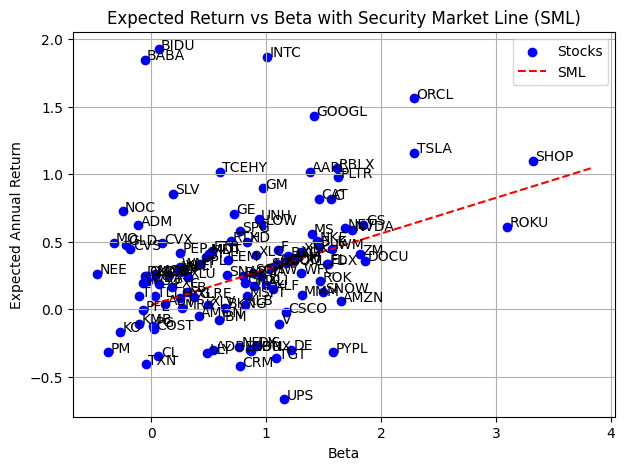

In [14]:

plt.figure(figsize=(7,5))
plt.scatter(df['Beta'], df['Expected_Return'], color='blue', label='Stocks')

beta_range = np.linspace(0, max(df['Beta']) + 0.5, 100)
sml = rf + beta_range * (rm - rf)
plt.plot(beta_range, sml, color='red', linestyle='--', label='SML')

for i, row in df.iterrows():
    plt.text(row['Beta']+0.02, row['Expected_Return'], row['Ticker'])

plt.xlabel('Beta')
plt.ylabel('Expected Annual Return')
plt.title('Expected Return vs Beta with Security Market Line (SML)')
plt.legend()
plt.grid(True)
plt.show()


Ejercicio:

Ajusta una regresion lineal a los puntos y compara la recta con la SML, interpreta lo que creas que significan los resultados de esta comparacion. (si lo consideras adecuado puedes usar algun tipo de regresion con regularizacion)

In [15]:
from sklearn.linear_model import LinearRegression

# Datos
X = df[['Beta']].values
y = df['Expected_Return'].values

# Ajustar regresión lineal
model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

print("Recta de regresión:")
print(f"y = {intercept:.4f} + {slope:.4f} * Beta")

Recta de regresión:
y = 0.1887 + 0.1776 * Beta


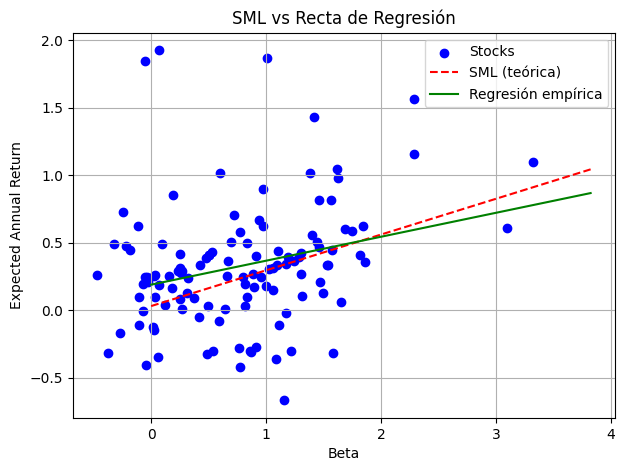

In [16]:
plt.figure(figsize=(7,5))
plt.scatter(df['Beta'], df['Expected_Return'], color='blue', label='Stocks')

# Recta SML teórica
beta_range = np.linspace(0, max(df['Beta']) + 0.5, 100)
sml = rf + beta_range * (rm - rf)
plt.plot(beta_range, sml, color='red', linestyle='--', label='SML (teórica)')

# Recta de regresión empírica
reg_line = intercept + slope * beta_range
plt.plot(beta_range, reg_line, color='green', label='Regresión empírica')

plt.xlabel('Beta')
plt.ylabel('Expected Annual Return')
plt.title('SML vs Recta de Regresión')
plt.legend()
plt.grid(True)
plt.show()

La regresion empirica dio y=0.1887 + 0.1776b, distinta de la SML teorica, el intercepto de la regresión salió mas alto que 3%, con 18.9%. El intercepto mayor y la pendiente menor indican que los activos de baja beta rinden mas de lo que predice el CAPM, mientras que el premio por riesgo es menor al esperado. Esto muestra que el CAPM no explica del todo los retornos.